In [1]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
import statsmodels.api as sm

In [2]:
df = pd.read_csv("data/HDFCBANK.csv")

In [3]:
df.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2000-01-03,HDFCBANK,EQ,157.40,166.00,170.00,166.00,170.00,170.00,169.52,33259,5.638122e+11,NaN,NaN,NaN
1,2000-01-04,HDFCBANK,EQ,170.00,182.00,183.45,171.00,174.00,173.80,174.99,168710,2.952261e+12,NaN,NaN,NaN
2,2000-01-05,HDFCBANK,EQ,173.80,170.00,173.90,165.00,168.00,166.95,169.20,159820,2.704094e+12,NaN,NaN,NaN
3,2000-01-06,HDFCBANK,EQ,166.95,168.00,170.00,165.30,168.95,168.30,168.44,85026,1.432166e+12,NaN,NaN,NaN
4,2000-01-07,HDFCBANK,EQ,168.30,162.15,171.00,162.15,170.75,168.35,166.79,85144,1.420158e+12,NaN,NaN,NaN


# Dropping unnecessary columns

In [6]:
df = df.drop(columns=['Turnover','Trades','Deliverable Volume','%Deliverble'],axis=1)
df.keys()

Index(['Date', 'Symbol', 'Series', 'Prev Close', 'Open', 'High', 'Low', 'Last',
       'Close', 'VWAP', 'Volume'],
      dtype='object')

# Checking for null/nan values

In [7]:
df.isna().sum()

Date          0
Symbol        0
Series        0
Prev Close    0
Open          0
High          0
Low           0
Last          0
Close         0
VWAP          0
Volume        0
dtype: int64

# Converting date into proper date format and then to index

In [10]:
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

In [13]:
df = df.drop('Last',axis=1)

In [14]:
df.describe()

,Prev Close,Open,High,Low,Close,VWAP,Volume
count,5306.000000,5306.000000,5306.000000,5306.000000,5306.000000,5306.000000,5.306000e+03
mean,1007.093884,1007.472767,1019.986939,993.822211,1007.330390,1006.929263,2.102580e+06
std,635.757762,635.461516,641.444674,629.502818,635.675021,635.481917,3.970048e+06
min,157.400000,162.150000,167.900000,157.000000,163.400000,161.400000,1.042000e+03
25%,479.912500,482.112500,486.912500,473.100000,480.200000,479.512500,3.058325e+05
50%,934.750000,939.350000,953.950000,922.175000,935.725000,937.455000,9.444650e+05
75%,1421.000000,1423.525000,1440.000000,1399.000000,1421.000000,1420.567500,2.123647e+06
max,2565.800000,2566.000000,2583.300000,2553.700000,2565.800000,2570.700000,1.005650e+08


# Data is ready for analysis and pred

# Checking for stationarity because ARIMA requires data to be stationary

In [15]:
def check_stationarity(series):
    result = adfuller(series)
    return result[0], result[1]

In [16]:
adf, p_val = check_stationarity(df['Close'])
print("ADF Statistic: ", adf)
print("p-value: ", p_val)

ADF Statistic:  -2.2957292911379663
p-value:  0.17334905995747601


In [17]:
if p_val <= 0.05:
    print("Data is stationary. Differencing not req")
else:
    print("Data is not stationary. Differencing is req")

Data is not stationary. Differencing is req


# Differencing the data and testing the adfuller test

In [18]:
df['Close_diff'] = df['Close'].diff().dropna()
adf_, p_val_ = check_stationarity(df['Close_diff'].dropna())
print("ADF Statistic: ", adf_)
print("p-value: ", p_val_)

ADF Statistic:  -73.37370374953953
p-value:  0.0


# Vis of 'Close' from 2000-2021

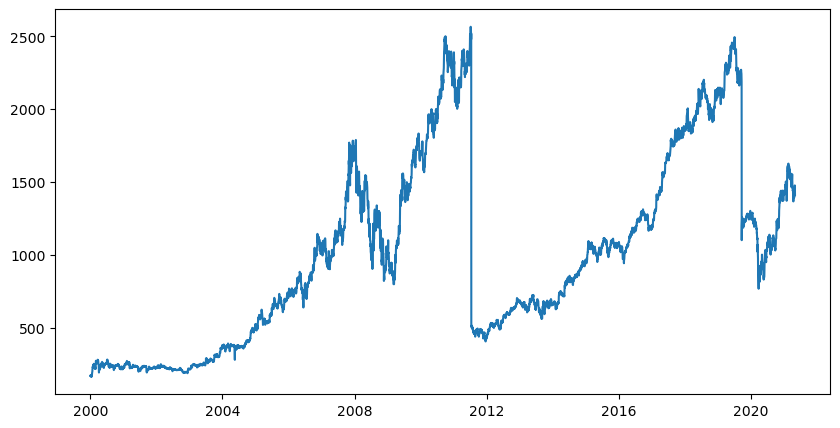

In [20]:
plt.figure(figsize=(10,5))
plt.plot(df['Close'])
plt.show()

# ACF and PACF Plots

C:\Users\G Varun\anaconda3\Lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


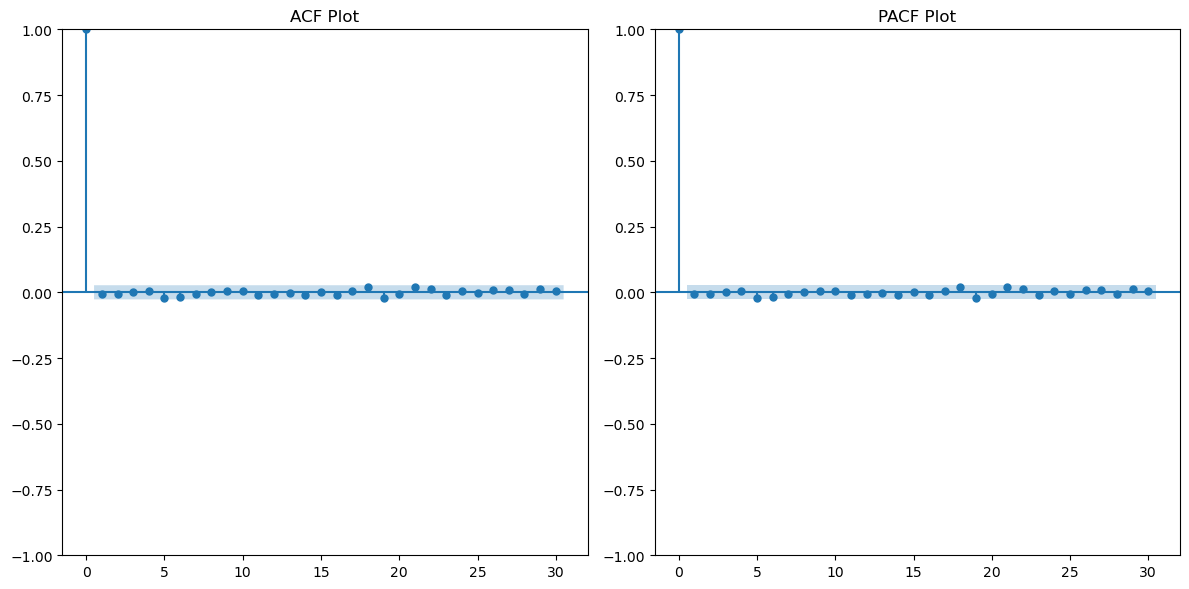

In [21]:
plt.figure(figsize=(12, 6))

plt.subplot(121)
plot_acf(df['Close_diff'].dropna(), ax=plt.gca(), lags=30)
plt.title('ACF Plot')

plt.subplot(122)
plot_pacf(df['Close_diff'].dropna(), ax=plt.gca(), lags=30)
plt.title('PACF Plot')

plt.tight_layout()
plt.show()

In [22]:
df.keys()

Index(['Symbol', 'Series', 'Prev Close', 'Open', 'High', 'Low', 'Close',
       'VWAP', 'Volume', 'Close_diff'],
      dtype='object')

# Model Fitting

In [26]:
p, d, q = 1, 1, 1
model = ARIMA(df['Close_diff'], order=(p, d, q))
model_fit = model.fit()

C:\Users\G Varun\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\G Varun\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\G Varun\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [27]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:             Close_diff   No. Observations:                 5306
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -26740.438
Date:                Sun, 13 Apr 2025   AIC                          53486.876
Time:                        10:49:07   BIC                          53506.605
Sample:                             0   HQIC                         53493.770
                               - 5306                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0077      0.011     -0.673      0.501      -0.030       0.015
ma.L1         -0.9997      0.003   -301.703      0.000      -1.006      -0.993
sigma2      1394.9497      4.117    338.832      0.000    1386.881    1403.019
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):         660379486.05
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):              10.46   Skew:                           -34.13
Prob(H) (two-sided):                  0.00   Kurtosis:                      1730.11
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

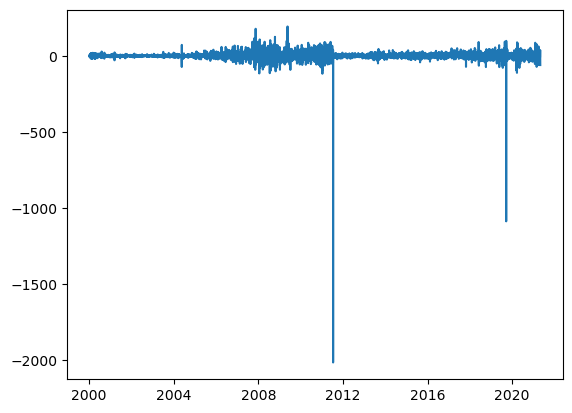

In [28]:
plt.plot(df['Close_diff'])
plt.show()

# Since there a abnormal outliers in the 'Close_diff', we have to remove them

In [29]:
temp = df['Close_diff'].loc[abs(df['Close_diff'])>100]
temp

Date
2007-10-23     116.30
2007-10-29     100.45
2007-11-14     178.10
2008-01-16    -115.20
2008-01-23     107.90
2008-07-15    -113.50
2008-07-23     103.30
2008-10-13     125.30
2008-10-24    -101.35
2009-05-18     193.15
2011-01-10    -117.20
2011-07-14   -2013.75
2019-09-19   -1086.70
2020-03-23    -111.30
Name: Close_diff, dtype: float64

# generalising the data to fit ARIMA characteristics

In [30]:
df['Close_diff'] = df['Close_diff'].clip(lower=-100, upper=100)

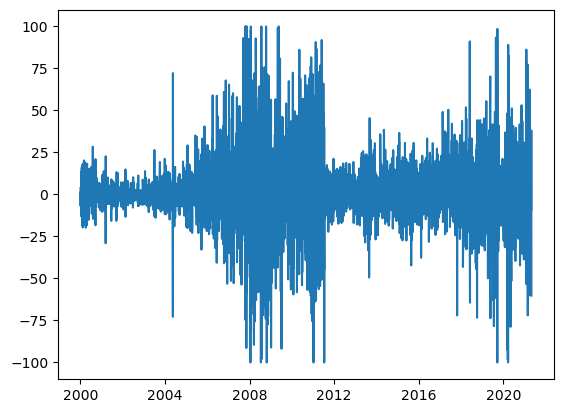

In [31]:
plt.plot(df['Close_diff'])
plt.show()

# Training the model again

In [39]:
df = df.dropna(subset=['Close_diff'])
p, d, q = 1, 1, 1
model = ARIMA(df['Close_diff'], order=(p, d, q))
model_fit = model.fit()

C:\Users\G Varun\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\G Varun\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\G Varun\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [40]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:             Close_diff   No. Observations:                 5305
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -23397.265
Date:                Sun, 13 Apr 2025   AIC                          46800.530
Time:                        11:12:14   BIC                          46820.258
Sample:                             0   HQIC                         46807.424
                               - 5305                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0417      0.008      5.032      0.000       0.025       0.058
ma.L1         -0.9999      0.004   -283.052      0.000      -1.007      -0.993
sigma2       396.7864      4.142     95.788      0.000     388.668     404.905
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              6581.27
Prob(Q):                              0.94   Prob(JB):                         0.00
Heteroskedasticity (H):               3.59   Skew:                             0.17
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.45
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

# Forecasting

In [44]:
# Forecast
forecast = model_fit.get_forecast(steps=730)
forecast_mean = forecast.predicted_mean

# Build future date range
last_date = df.index[-1]
future_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=730, freq='D')
forecast_series = pd.Series(forecast_mean.values, index=future_dates)

C:\Users\G Varun\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


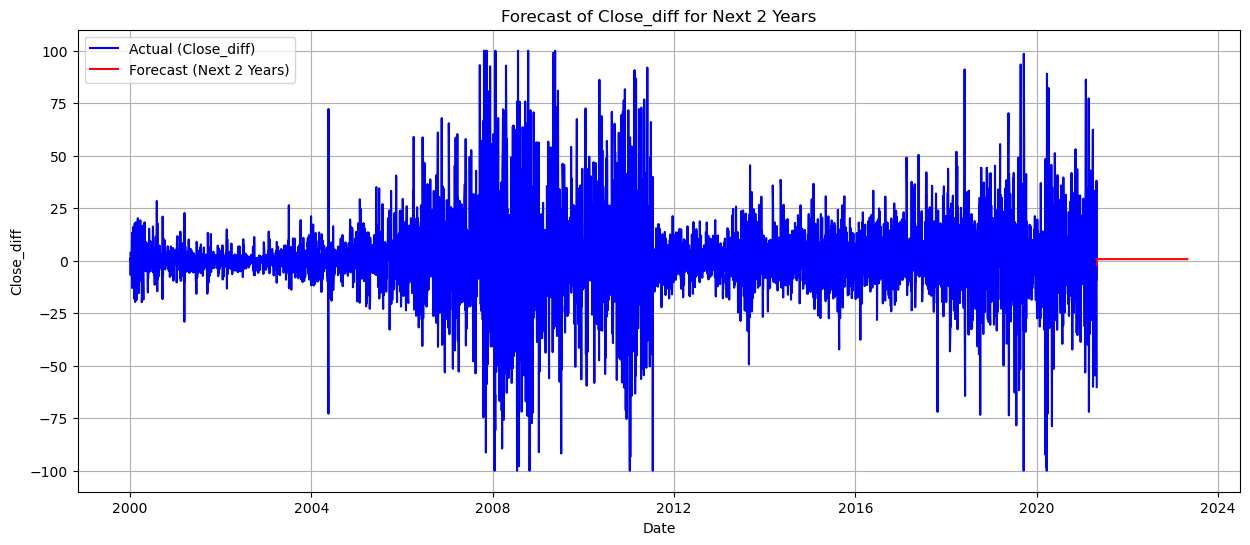

In [45]:
plt.figure(figsize=(15, 6))
plt.plot(df['Close_diff'], label='Actual (Close_diff)', color='blue')
plt.plot(forecast_series, label='Forecast (Next 2 Years)', color='red')
plt.title('Forecast of Close_diff for Next 2 Years')
plt.xlabel('Date')
plt.ylabel('Close_diff')
plt.legend()
plt.grid(True)
plt.show()

In [46]:
forecast_series

2021-05-01   -1.788153
2021-05-02    0.647376
2021-05-03    0.748927
2021-05-04    0.753162
2021-05-05    0.753338
                ...   
2023-04-26    0.753346
2023-04-27    0.753346
2023-04-28    0.753346
2023-04-29    0.753346
2023-04-30    0.753346
Freq: D, Length: 730, dtype: float64

In [47]:
# Assume df['Close'] exists and is original price
last_real_close = df['Close'].iloc[-1]

# Reconstruct Close from differenced forecast
forecast_cumsum = forecast_series.cumsum()
forecast_close = last_real_close + forecast_cumsum

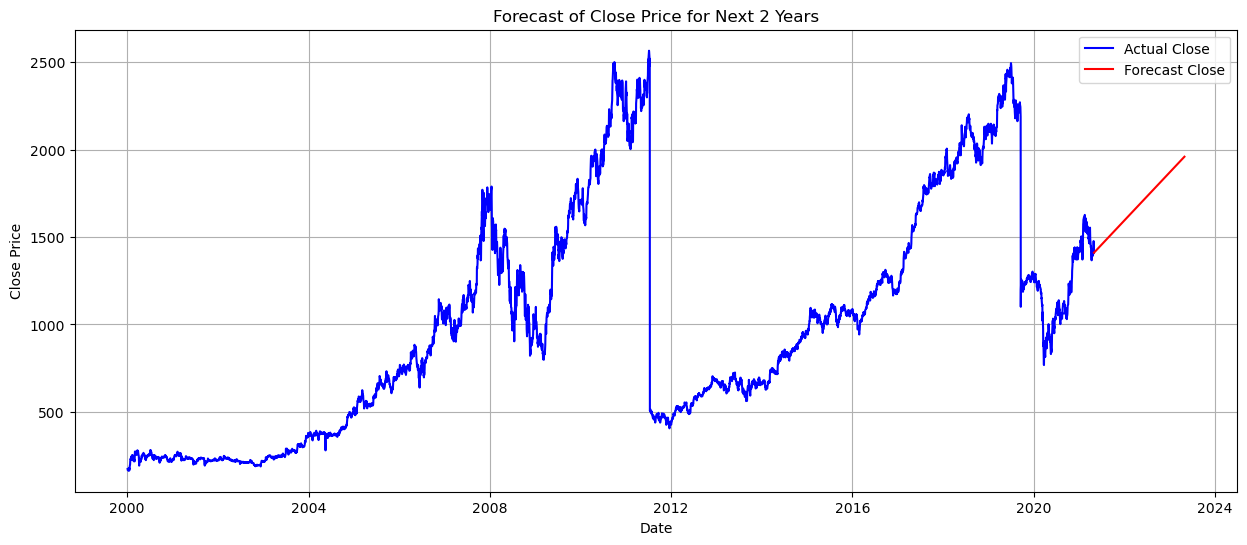

In [48]:
plt.figure(figsize=(15, 6))
plt.plot(df['Close'], label='Actual Close', color='blue')
plt.plot(forecast_close, label='Forecast Close', color='red')
plt.title('Forecast of Close Price for Next 2 Years')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.show()

In [52]:
forecast_close

5305    1412.756970
5306    1412.954447
5307    1413.039785
5308    1413.076663
5309    1413.092600
           ...     
6030    1413.104728
6031    1413.104728
6032    1413.104728
6033    1413.104728
6034    1413.104728
Name: predicted_mean, Length: 730, dtype: float64

# The Model is trained and fit successfully

# The forecast tells us that the price of HDFC stock is likely to increase in the next two years based on ARIMA model